In [ ]:
!nvidia-smi

Sat Jun 24 02:54:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive'

MyDrive


In [ ]:
train_path = '/content/drive/MyDrive/bodybuilder1/train'
test_path = '/content/drive/MyDrive/bodybuilder1/test'
val_path = '/content/drive/MyDrive/bodybuilder1/valid'

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.keras.layers.Input
tf.keras.layers.Lambda
tf.keras.layers.Dense
tf.keras.layers.Flatten
tf.keras.models.Model
tf.keras.applications.resnet50.ResNet50
tf.keras.preprocessing.image
tf.keras.preprocessing.image.ImageDataGenerator
tf.keras.models.Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import os

import random

import pandas as pd
import seaborn as sns

In [ ]:
class_labels = sorted(os.listdir(train_path))
class_labels

['non_steroid', 'steroid']

In [ ]:
directories = os.listdir(train_path)
image_steroid = []
image_non_steroid = []
class_images = []

for d in directories:
    image_paths = train_path + '/' + d + '/*.jpg'
    image_files = glob(image_paths)
    for i in range(5):
        if d == 'steroid':
            image_steroid.append(plt.imread(image_files[random.randint(0, len(image_files) - 1)]))
        else:
            image_non_steroid.append(plt.imread(image_files[random.randint(0, len(image_files) - 1)]))
    class_images.append(image_files)

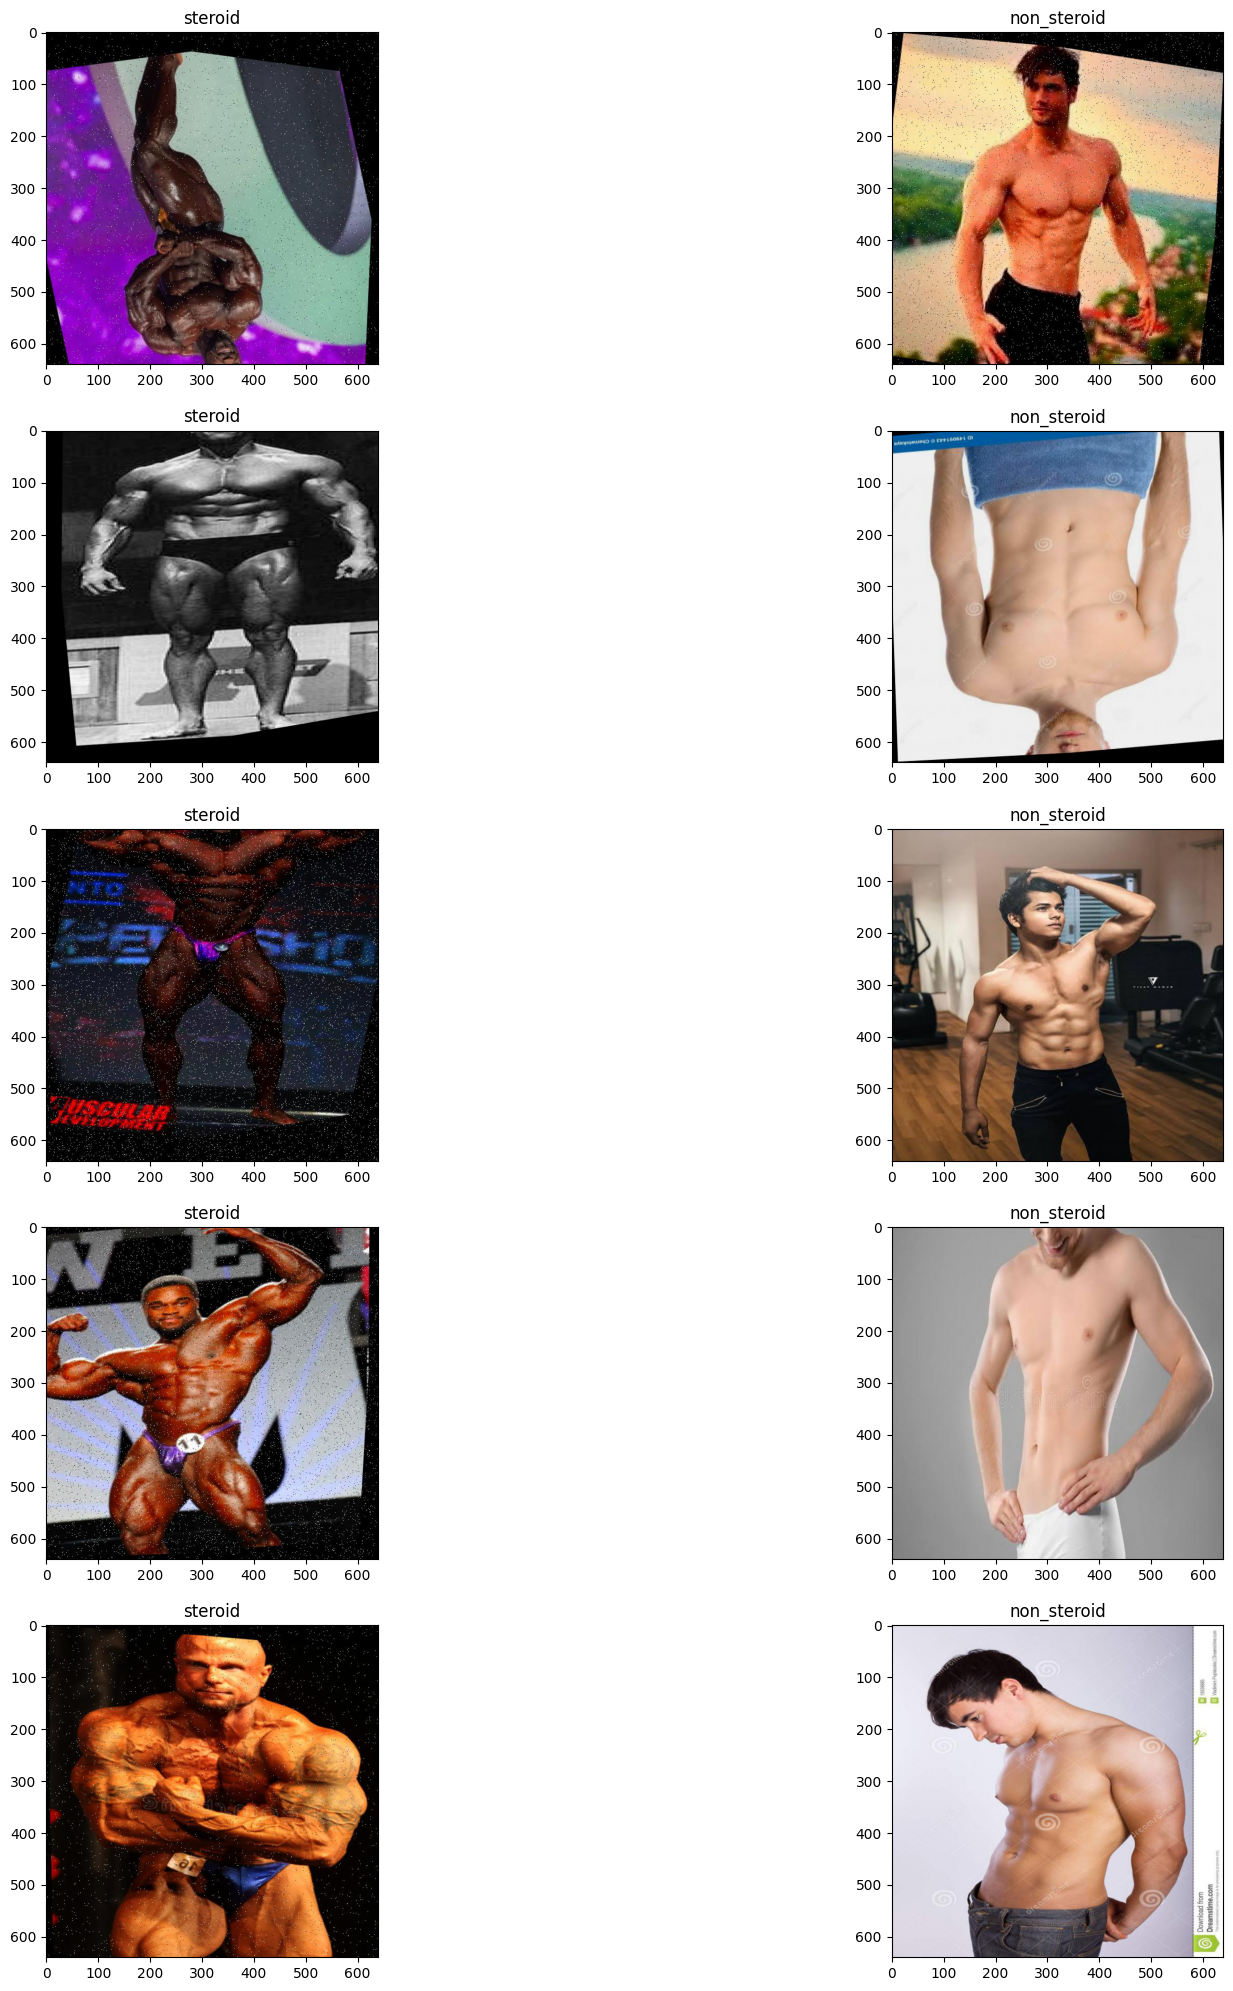

In [ ]:
plt.figure(figsize=(20,25))

count = 0
offset = 1

while count < len(image_steroid):
    plt.subplot(5,2,count+offset)
    # image = batch[0]
    plt.imshow(np.squeeze(image_steroid[count]))
    plt.title('steroid')
    plt.subplot(5,2,count+offset+1)
    # image = batch[0]
    plt.imshow(np.squeeze(image_non_steroid[count]))
    plt.title('non_steroid')

    count += 1
    offset += 1

In [ ]:
train_image_count = []

for i in class_images:
    train_image_count.append(len(i))

train_image_count

[1565, 1549]

In [ ]:
directories = os.listdir(test_path)
test_image_count = []

for d in directories:
    image_paths = test_path + '/' + d + r'/*.jpg'
    image_files = glob(image_paths)
    test_image_count.append(len(image_files))

test_image_count

[392, 279]

In [ ]:
directories = os.listdir(val_path)
val_image_count = []

for d in directories:
    image_paths = val_path + '/' + d + r'/*.jpg'
    image_files = glob(image_paths)
    val_image_count.append(len(image_files))

val_image_count

[257, 297]

In [ ]:
dataset_info = pd.DataFrame({'Label': class_labels, 'Train_Count': train_image_count, 'Test_Count': test_image_count, 'Val_Count': val_image_count})
dataset_info

Label  Train_Count  Test_Count  Val_Count
0  non_steroid         1565         392        257
1      steroid         1549         279        297

In [ ]:
df = pd.melt(dataset_info, id_vars='Label', var_name='Split', value_name="Count")
df

Label        Split  Count
0  non_steroid  Train_Count   1565
1      steroid  Train_Count   1549
2  non_steroid   Test_Count    392
3      steroid   Test_Count    279
4  non_steroid    Val_Count    257
5      steroid    Val_Count    297

<Figure size 2000x800 with 0 Axes>

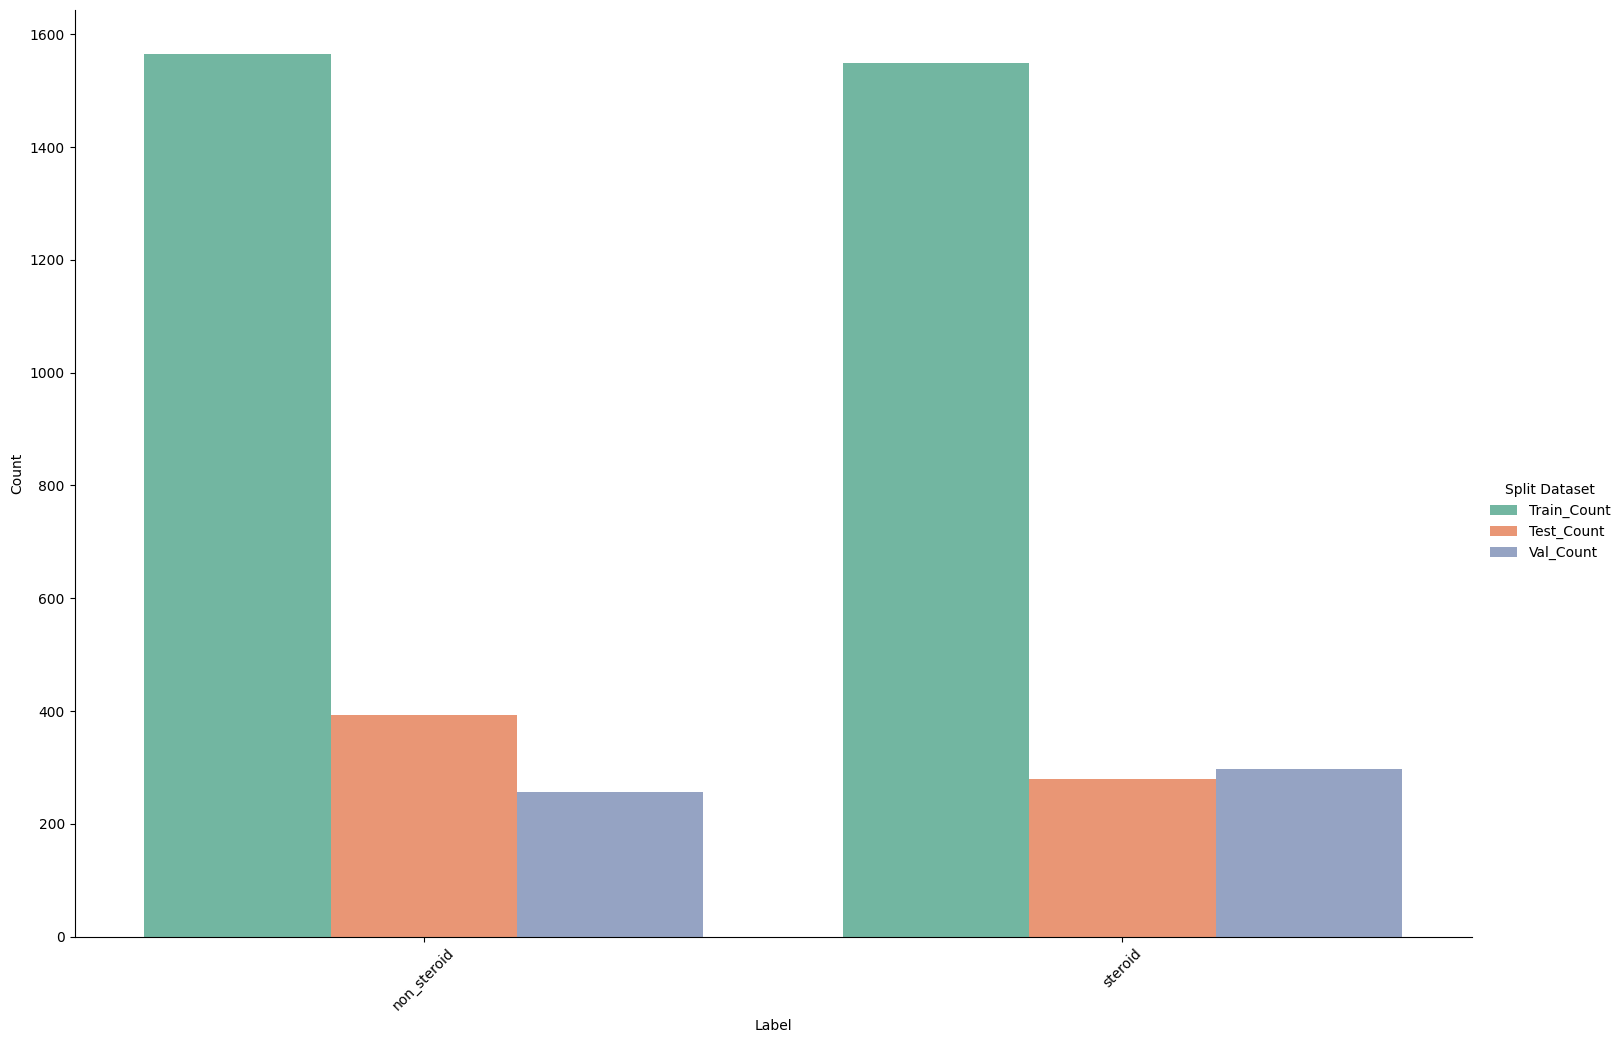

In [ ]:
plt.figure(figsize=(20, 8))

g = sns.catplot(
    data=df, kind='bar',
    x='Label', y='Count', hue='Split', palette='Set2', height=10, aspect=1.5)

plt.xticks(rotation=45)
g.set_axis_labels('Label', 'Count')
g.legend.set_title('Split Dataset')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (244, 244)

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_path,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(val_path,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_path,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 3114 files belonging to 2 classes.
Found 554 files belonging to 2 classes.
Found 671 files belonging to 2 classes.


In [ ]:
class_names = train_dataset.class_names

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.resnet50.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 250, 250, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 122, 122, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

In [ ]:
inputs = tf.keras.Input(shape=(244, 244, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 244, 244, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 244, 244, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 244, 244, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [ ]:
initial_epochs = 20

loss0, accuracy0 = model.evaluate(validation_dataset)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

18/18 [==============================] - 83s 2s/step - loss: 0.7628 - accuracy: 0.5253
initial loss: 0.76
initial accuracy: 0.53


In [ ]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset)

Epoch 1/20
98/98 [==============================] - 279s 3s/step - loss: 0.6298 - accuracy: 0.6468 - val_loss: 0.4305 - val_accuracy: 0.8375
Epoch 2/20
98/98 [==============================] - 14s 134ms/step - loss: 0.4328 - accuracy: 0.8054 - val_loss: 0.3104 - val_accuracy: 0.9043
Epoch 3/20
98/98 [==============================] - 14s 135ms/step - loss: 0.3494 - accuracy: 0.8513 - val_loss: 0.2482 - val_accuracy: 0.9260
Epoch 4/20
98/98 [==============================] - 14s 136ms/step - loss: 0.3047 - accuracy: 0.8715 - val_loss: 0.2151 - val_accuracy: 0.9350
Epoch 5/20
98/98 [==============================] - 14s 136ms/step - loss: 0.2758 - accuracy: 0.8860 - val_loss: 0.1902 - val_accuracy: 0.9368
Epoch 6/20
98/98 [==============================] - 14s 136ms/step - loss: 0.2597 - accuracy: 0.8943 - val_loss: 0.1753 - val_accuracy: 0.9404
Epoch 7/20
98/98 [==============================] - 14s 137ms/step - loss: 0.2418 - accuracy: 0.9030 - val_loss: 0.1597 - val_accuracy: 0.9440
E

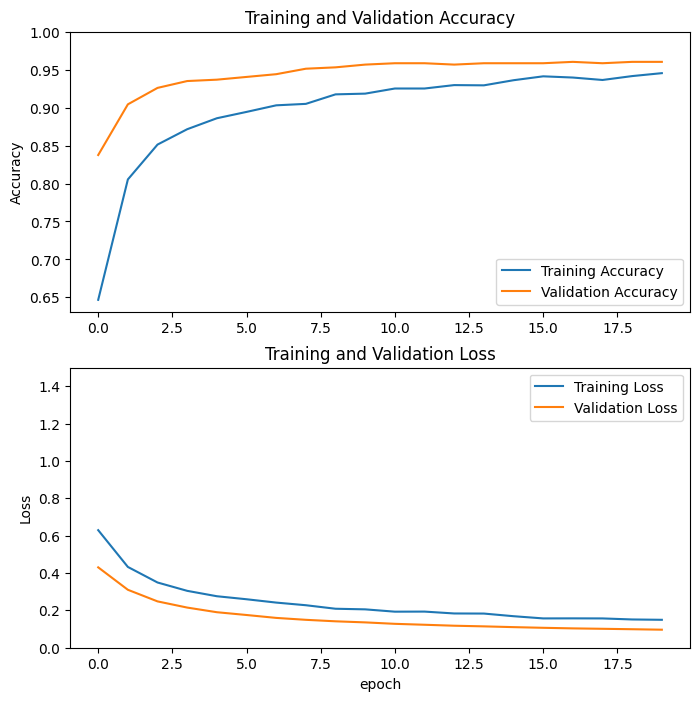

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
print("No. of layers in base model: ", len(base_model.layers))

for layer in base_model.layers:
  layer.trainable = True

No. of layers in base model:  175


In [ ]:
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/100),
              metrics=["accuracy", keras.metrics.Precision(), keras.metrics.Recall()])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 244, 244, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 244, 244, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 244, 244, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [ ]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 20/40
98/98 [==============================] - 42s 416ms/step - loss: 0.0015 - accuracy: 0.9994 - precision: 1.0000 - recall: 0.9987 - val_loss: 0.0248 - val_accuracy: 0.9910 - val_precision: 0.9961 - val_recall: 0.9844
Epoch 21/40
98/98 [==============================] - 41s 408ms/step - loss: 0.0014 - accuracy: 0.9997 - precision: 1.0000 - recall: 0.9994 - val_loss: 0.0296 - val_accuracy: 0.9874 - val_precision: 0.9960 - val_recall: 0.9767
Epoch 22/40
98/98 [==============================] - 41s 409ms/step - loss: 7.8123e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0294 - val_accuracy: 0.9892 - val_precision: 0.9960 - val_recall: 0.9805
Epoch 23/40
98/98 [==============================] - 41s 408ms/step - loss: 9.1109e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0265 - val_accuracy: 0.9892 - val_precision: 0.9960 - val_recall: 0.9805
Epoch 24/40
98/98 [==============================] - 41s 410ms/step - loss: 0.0013 - acc

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

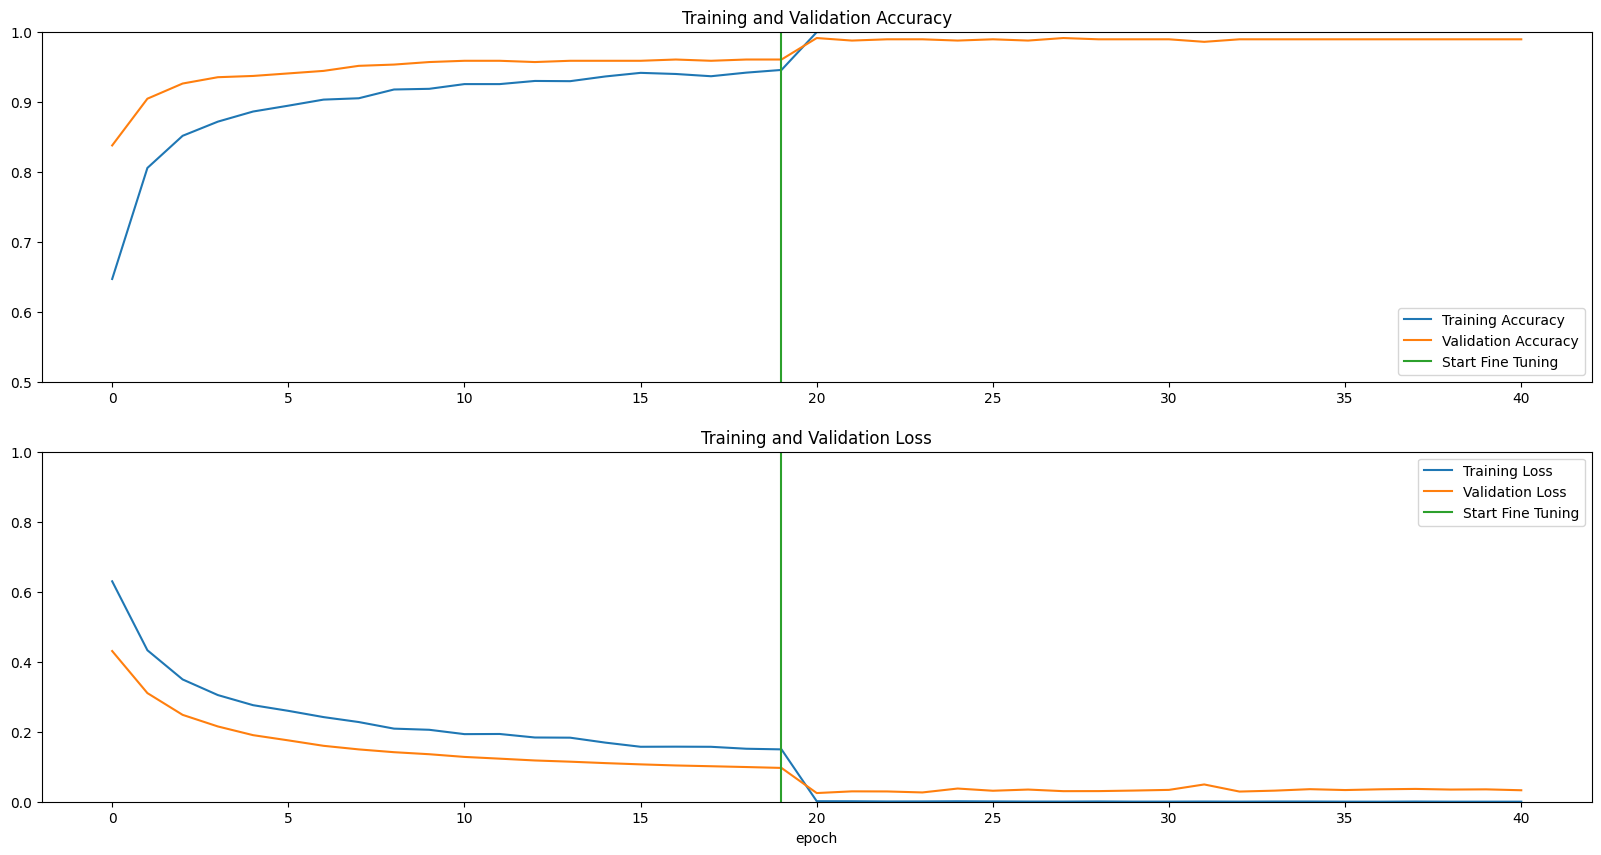

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

21/21 [==============================] - 98s 3s/step - loss: 0.0860 - accuracy: 0.9836 - precision: 0.9823 - recall: 0.9898


ValueError: ignored

Predictions:
 [0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1]
Labels:
 [0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1]


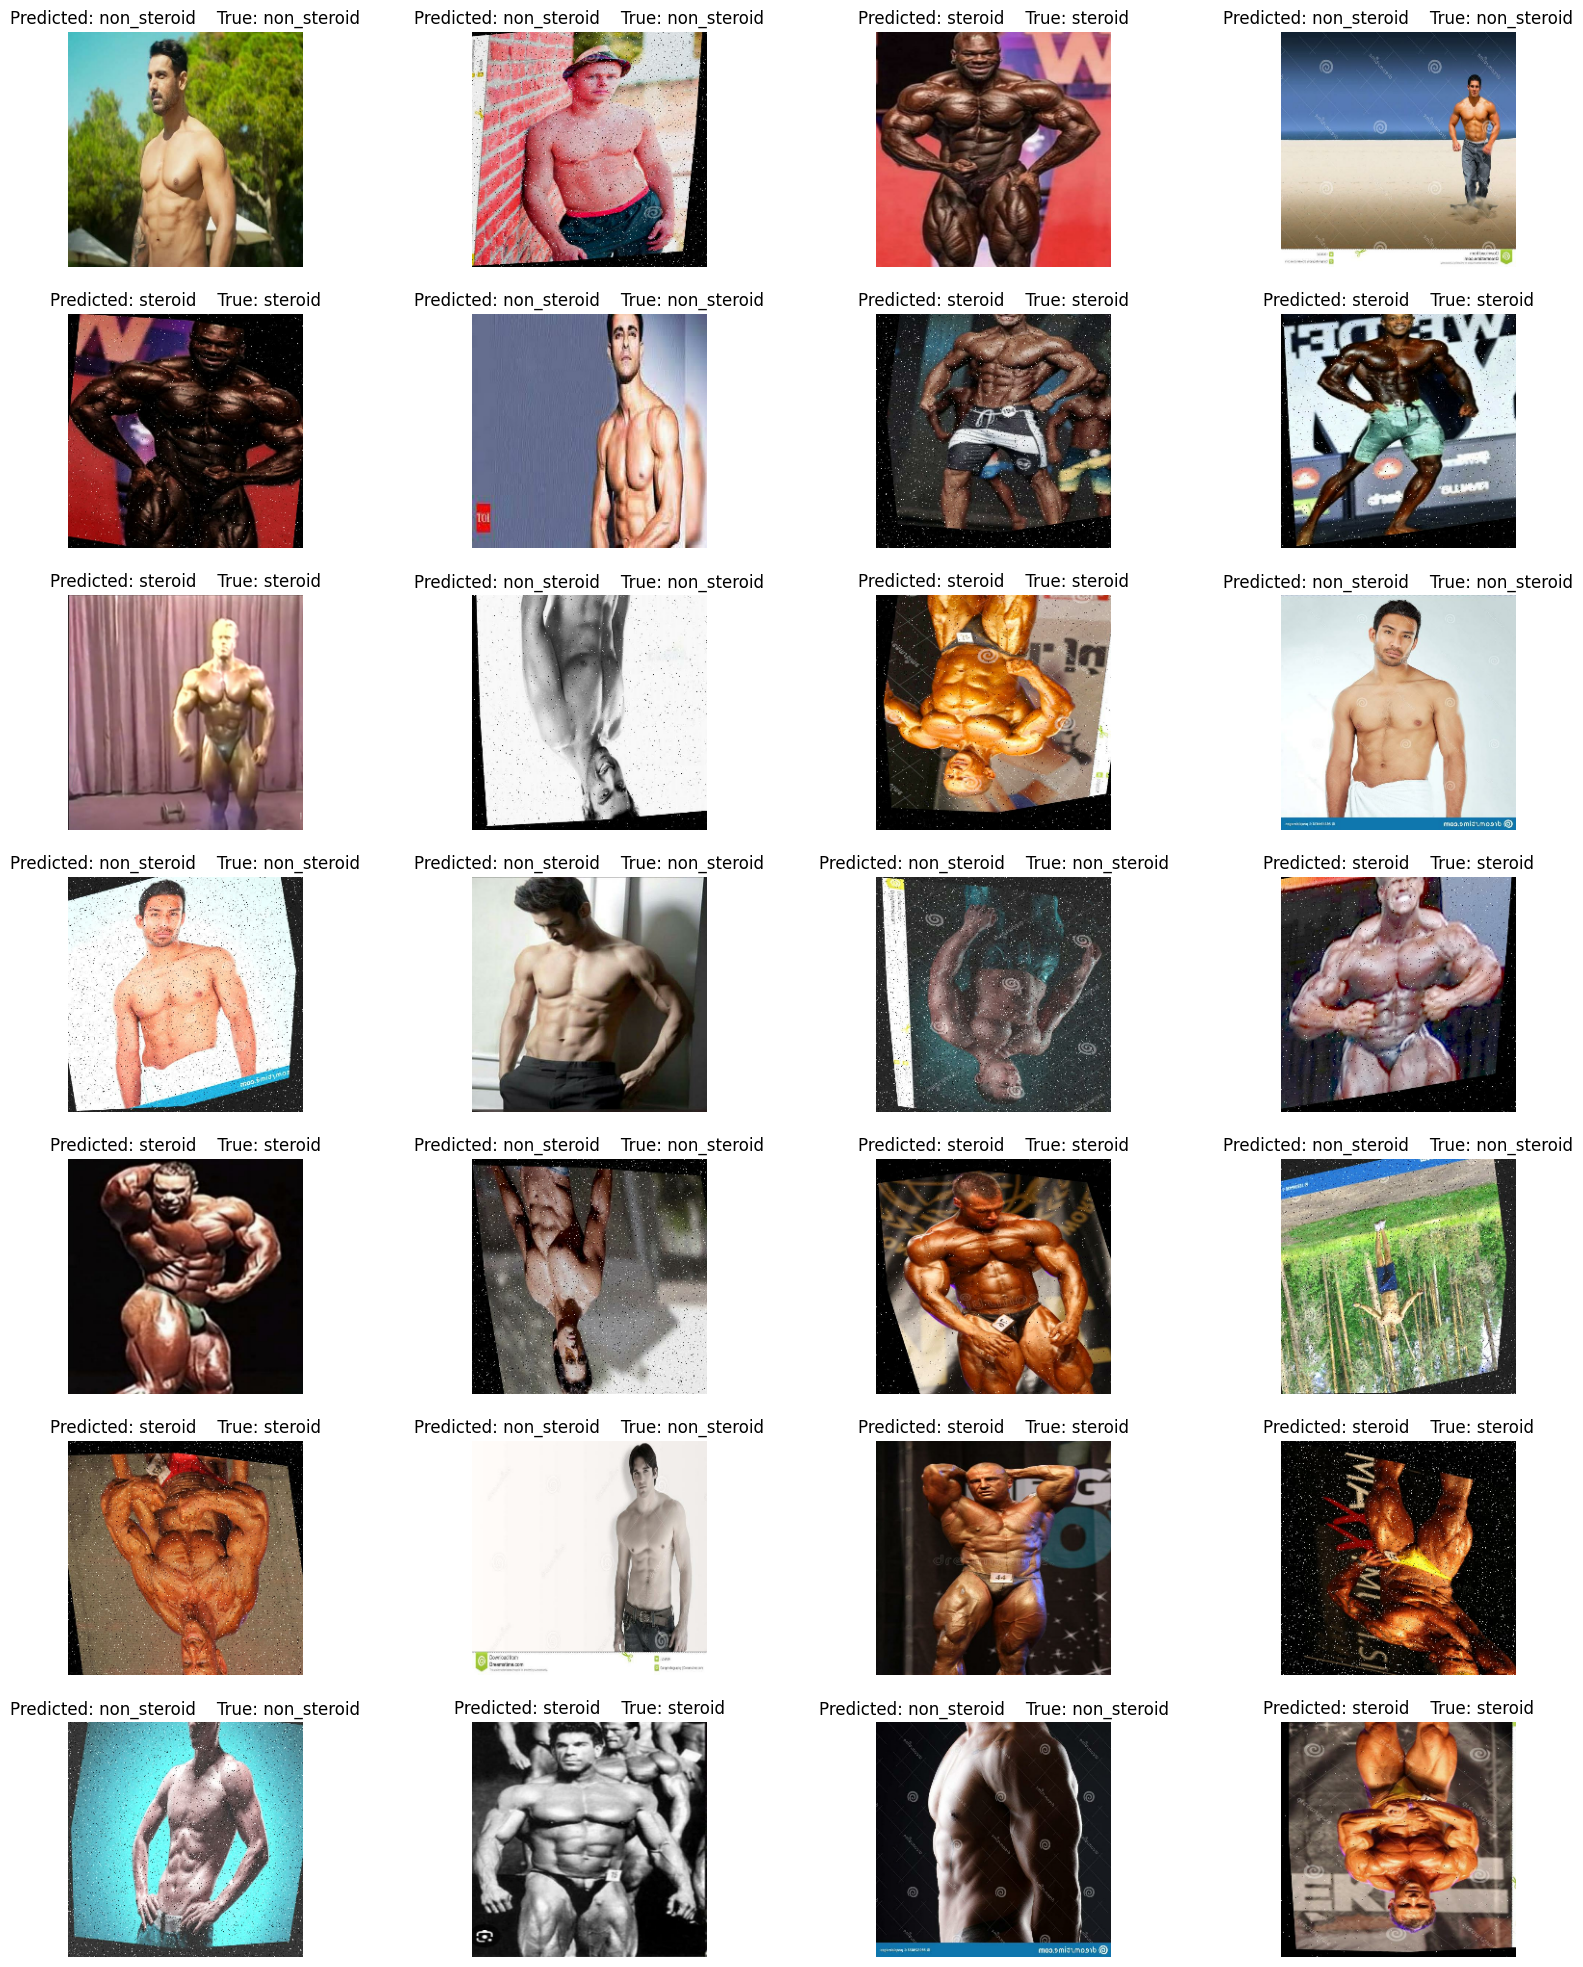

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

plt.figure(figsize=(20, 25))
for i in range(28):
  ax = plt.subplot(7, 4, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title('Predicted: '+ class_names[predictions[i]] + '    True: ' + class_names[label_batch[i]])
  plt.axis("off")

In [ ]:
model.save('buildresnet.h5')

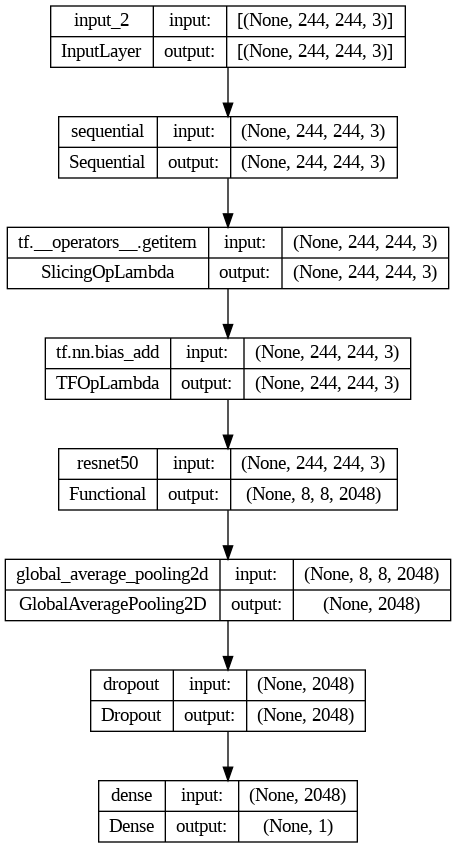

In [ ]:
from tensorflow import keras

keras.utils.plot_model(model, "model.png", show_shapes=True)

In [ ]:
predict = np.array([])
l =  np.array([])
for x, y in test_dataset:
  p = model.predict(x).flatten()
  p = tf.nn.sigmoid(p)
  p = tf.where(p < 0.5, 0, 1)
  predict = np.concatenate([predict, p])
  l = np.concatenate([l, y])

1/1 [==============================] - 0s 37ms/step


In [ ]:
from sklearn.metrics import classification_report
# Classification Report
report = classification_report(l, predict, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 non_steroid       0.99      0.96      0.97       279
     steroid       0.97      0.99      0.98       392

    accuracy                           0.98       671
   macro avg       0.98      0.98      0.98       671
weighted avg       0.98      0.98      0.98       671

